Based on https://www.bioconductor.org/help/workflows/rnaseqGene/

Data from https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-5710/


Aligned end-to-end (not local) to GRCh38.min (no extras. just Chr1-22, X, Y and M


In [1]:
#library("airway")
#Loading required package: SummarizedExperiment
#Loading required package: GenomicRanges
#Loading required package: stats4
#Loading required package: BiocGenerics
#Loading required package: parallel

# Not sure if any of these are needed so we'll find out.

The R function system.file can be used to find out where on your computer the files from a package have been installed. Here we ask for the full path to the extdata directory, where R packages store external data, that is part of the airway package.

In [2]:
#indir <- system.file("extdata", package="airway", mustWork=TRUE)
#indir

In this directory, we find the eight BAM files (and some other files):

In [3]:
#list.files(indir)

Typically, we have a table with detailed information for each of our samples that links samples to the associated FASTQ and BAM files. For your own project, you might create such a comma-separated value (CSV) file using a text editor or spreadsheet software such as Excel.

We load such a CSV file with read.csv:

---

Now we'll try to use our own data.

Well. Not our own, but some other data.


I downloaded the raw GRCh38 fasta and gtf file.

And created a bowtie2 reference from the fasta file.



```
for f in $( ls *_1.fastq.gz ); do
n=${f%_1.fastq.gz}
echo $f $n
bowtie2 --very-sensitive -x GRCh38.min \
	-1 ${n}_1.fastq.gz -2 ${n}_2.fastq.gz --threads 4 | samtools sort -o end2end/$n.bam -
samtools index end2end/$n.bam
done
```



In [4]:
mydir = "E-MTAB-5710"
list.files(paste0(mydir,"/endtoend/"),pattern="*bam$")

[1] "ERR1949303.bam" "ERR1949304.bam" "ERR1949305.bam" "ERR1949306.bam"
  [5] "ERR1949307.bam" "ERR1949308.bam" "ERR1949309.bam" "ERR1949310.bam"
  [9] "ERR1949311.bam" "ERR1949312.bam" "ERR1949313.bam" "ERR1949314.bam"
 [13] "ERR1949315.bam" "ERR1949316.bam" "ERR1949317.bam" "ERR1949318.bam"
 [17] "ERR1949319.bam" "ERR1949320.bam" "ERR1949321.bam" "ERR1949322.bam"
 [21] "ERR1949323.bam" "ERR1949324.bam" "ERR1949325.bam" "ERR1949326.bam"
 [25] "ERR1949327.bam" "ERR1949328.bam" "ERR1949329.bam" "ERR1949330.bam"
 [29] "ERR1949331.bam" "ERR1949332.bam" "ERR1949333.bam" "ERR1949334.bam"
 [33] "ERR1949335.bam" "ERR1949336.bam" "ERR1949337.bam" "ERR1949338.bam"
 [37] "ERR1949339.bam" "ERR1949340.bam" "ERR1949341.bam" "ERR1949342.bam"
 [41] "ERR1949343.bam" "ERR1949344.bam" "ERR1949345.bam" "ERR1949346.bam"
 [45] "ERR1949347.bam" "ERR1949348.bam" "ERR1949349.bam" "ERR1949350.bam"
 [49] "ERR1949351.bam" "ERR1949352.bam" "ERR1949353.bam" "ERR1949354.bam"
 [53] "ERR1949355.bam" "ERR1949356.bam" "ERR1949357.bam" "ERR1949358.bam"
 [57] "ERR1949359.bam" "ERR1949360.bam" "ERR1949361.bam" "ERR1949362.bam"
 [61] "ERR1949363.bam" "ERR1949364.bam" "ERR1949365.bam" "ERR1949366.bam"
 [65] "ERR1949367.bam" "ERR1949368.bam" "ERR1949369.bam" "ERR1949370.bam"
 [69] "ERR1949371.bam" "ERR1949372.bam" "ERR1949373.bam" "ERR1949374.bam"
 [73] "ERR1949375.bam" "ERR1949376.bam" "ERR1949377.bam" "ERR1949378.bam"
 [77] "ERR1949379.bam" "ERR1949380.bam" "ERR1949381.bam" "ERR1949382.bam"
 [81] "ERR1949383.bam" "ERR1949384.bam" "ERR1949385.bam" "ERR1949386.bam"
 [85] "ERR1949387.bam" "ERR1949388.bam" "ERR1949389.bam" "ERR1949390.bam"
 [89] "ERR1949391.bam" "ERR1949392.bam" "ERR1949393.bam" "ERR1949394.bam"
 [93] "ERR1949395.bam" "ERR1949396.bam" "ERR1949397.bam" "ERR1949398.bam"
 [97] "ERR1949399.bam" "ERR1949400.bam" "ERR1949401.bam" "ERR1949402.bam"
[101] "ERR1949403.bam" "ERR1949404.bam" "ERR1949405.bam" "ERR1949406.bam"
[105] "ERR1949407.bam" "ERR1949408.bam" "ERR1949409.bam" "ERR1949410.bam"
[109] "ERR1949411.bam" "ERR1949412.bam" "ERR1949413.bam" "ERR1949414.bam"
[113] "ERR1949415.bam" "ERR1949416.bam" "ERR1949417.bam" "ERR1949418.bam"
[117] "ERR1949419.bam" "ERR1949420.bam" "ERR1949421.bam" "ERR1949422.bam"
[121] "ERR1949423.bam" "ERR1949424.bam" "ERR1949425.bam" "ERR1949426.bam"
[125] "ERR1949427.bam" "ERR1949428.bam" "ERR1949429.bam" "ERR1949430.bam"
[129] "ERR1949431.bam" "ERR1949432.bam" "ERR1949433.bam" "ERR1949434.bam"
[133] "ERR1949435.bam" "ERR1949436.bam" "ERR1949437.bam" "ERR1949438.bam"
[137] "ERR1949439.bam" "ERR1949440.bam" "ERR1949441.bam" "ERR1949442.bam"
[141] "ERR1949443.bam" "ERR1949444.bam" "ERR1949445.bam" "ERR1949446.bam"
[145] "ERR1949447.bam" "ERR1949448.bam" "ERR1949449.bam" "ERR1949450.bam"
[149] "ERR1949451.bam" "ERR1949452.bam" "ERR1949453.bam" "ERR1949454.bam"
[153] "ERR1949455.bam" "ERR1949456.bam" "ERR1949457.bam" "ERR1949458.bam"
[157] "ERR1949459.bam" "ERR1949460.bam" "ERR1949461.bam" "ERR1949462.bam"
[161] "ERR1949463.bam" "ERR1949464.bam" "ERR1949465.bam" "ERR1949466.bam"
[165] "ERR1949467.bam" "ERR1949468.bam" "ERR1949469.bam" "ERR1949470.bam"
[169] "ERR1949471.bam" "ERR1949472.bam" "ERR1949473.bam" "ERR1949474.bam"
[173] "ERR1949475.bam" "ERR1949476.bam" "ERR1949477.bam" "ERR1949478.bam"
[177] "ERR1949479.bam" "ERR1949480.bam" "ERR1949481.bam" "ERR1949482.bam"
[181] "ERR1949483.bam" "ERR1949484.bam" "ERR1949485.bam" "ERR1949486.bam"
[185] "ERR1949487.bam" "ERR1949488.bam" "ERR1949489.bam" "ERR1949490.bam"
[189] "ERR1949491.bam" "ERR1949492.bam" "ERR1949493.bam" "ERR1949494.bam"
[193] "ERR1949495.bam" "ERR1949496.bam" "ERR1949497.bam" "ERR1949498.bam"
[197] "ERR1949499.bam" "ERR1949500.bam" "ERR1949501.bam" "ERR1949502.bam"
[201] "ERR1949503.bam" "ERR1949504.bam" "ERR1949505.bam" "ERR1949506.bam"
[205] "ERR1949507.bam" "ERR1949508.bam" "ERR1949509.bam" "ERR1949510.bam"
[209] "ERR1949511.bam" "ERR1949512.bam" "ERR1949513.bam" "ERR1949514.bam"
[213] "ERR1949515.bam" "ERR1949516.bam" "ERR1949517.bam" "ERR1949518.bam"
[217] 

Create sample_table.csv

```
echo '"",Run,individual,disease' > sample_table.csv
awk -F"\t" '(NR > 1){gsub("breast ","",$33);print $28","$28","$32","$33}' E-MTAB-5710.sdrf.txt | uniq >> sample_table.csv
chmod -w sample_table.csv
```

Added "Individual" and "Disease" columns instead of "dex" and "cell" columns with real values.

In [5]:
csvfile <- file.path(mydir, "sample_table.csv")
sampleTable <- read.csv(csvfile, row.names = 1)
sampleTable

,Run,individual,disease
ERR1949303,ERR1949303,AA1019,carcinoma
ERR1949304,ERR1949304,AA1019,normal
ERR1949305,ERR1949305,AA1045,carcinoma
ERR1949306,ERR1949306,AA1045,normal
ERR1949307,ERR1949307,AA1077,carcinoma
ERR1949308,ERR1949308,AA1077,normal
ERR1949309,ERR1949309,AA1080,carcinoma
ERR1949310,ERR1949310,AA1080,normal
ERR1949311,ERR1949311,AA1090,carcinoma
ERR1949312,ERR1949312,AA1090,normal


Once the reads have been aligned, there are a number of tools that can be used to count the number of reads/fragments that can be assigned to genomic features for each sample. These often take as input SAM/BAM alignment files and a file specifying the genomic features, e.g. a GFF3 or GTF file specifying the gene models.


## 3.4 DESeq2 import functions
The following tools can be used generate count matrices: summarizeOverlaps (Lawrence et al. 2013), featureCounts (Liao, Smyth, and Shi 2014), tximport (Soneson, Love, and Robinson 2015), htseq-count (Anders, Pyl, and Huber 2015).

```
function	package	framework	output	DESeq2 input function
summarizeOverlaps	GenomicAlignments	R/Bioconductor	SummarizedExperiment	DESeqDataSet
featureCounts	Rsubread	R/Bioconductor	matrix	DESeqDataSetFromMatrix
tximport	tximport	R/Bioconductor	list of matrices	DESeqDataSetFromTximport
htseq-count	HTSeq	Python	files	DESeqDataSetFromHTSeq
```
We now proceed using summarizeOverlaps. Using the Run column in the sample table, we construct the full paths to the files we want to perform the counting operation on:

In [6]:
#filenames <- file.path(indir, paste0(sampleTable$Run, "_subset.bam"))
filenames <- file.path(mydir, paste0("endtoend/",sampleTable$Run, ".bam"))
file.exists(filenames)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[166] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[181] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[196] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[226] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[241] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[256] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[271] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[286] TRUE TRUE TRUE TRUE TRUE

We indicate in Bioconductor that these files are BAM files using the BamFileList function from the Rsamtools package that provides an R interface to BAM files. Here we also specify details about how the BAM files should be treated, e.g., only process 2 million reads at a time. See ?BamFileList for more information.

In [7]:
library("Rsamtools")
bamfiles <- BamFileList(filenames, yieldSize=2000000)
bamfiles

Loading required package: GenomeInfoDb
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading req

BamFileList of length 290
names(290): ERR1949303.bam ERR1949304.bam ... ERR1949591.bam ERR1949592.bam

Note: make sure that the chromosome names of the genomic features in the annotation you use are consistent with the chromosome names of the reference used for read alignment. Otherwise, the scripts might fail to count any reads to features due to the mismatching names. For example, a common mistake is when the alignment files contain chromosome names in the style of 1 and the gene annotation in the style of chr1, or the other way around. See the seqlevelsStyle function in the GenomeInfoDb package for solutions. We can check the chromosome names (here called “seqnames”) in the alignment files like so:

In [8]:
bamfiles[1]

BamFileList of length 1
names(1): ERR1949303.bam

seqinfo is header info regarding the reference, not the sample

In [9]:
seqinfo(bamfiles[1])

Seqinfo object with 25 sequences from an unspecified genome:
  seqnames seqlengths isCircular genome
  chr1      248956422       <NA>   <NA>
  chr2      242193529       <NA>   <NA>
  chr3      198295559       <NA>   <NA>
  chr4      190214555       <NA>   <NA>
  chr5      181538259       <NA>   <NA>
  ...             ...        ...    ...
  chr21      46709983       <NA>   <NA>
  chr22      50818468       <NA>   <NA>
  chrX      156040895       <NA>   <NA>
  chrY       57227415       <NA>   <NA>
  chrM          16569       <NA>   <NA>

## 3.5 Defining gene models
Next, we need to read in the gene model that will be used for counting reads/fragments. We will read the gene model from an Ensembl GTF file (Flicek et al. 2014), using makeTxDbFromGFF from the GenomicFeatures package. GTF files can be downloaded from Ensembl’s FTP site or other gene model repositories. A TxDb object is a database that can be used to generate a variety of range-based objects, such as exons, transcripts, and genes. We want to make a list of exons grouped by gene for counting read/fragments.

There are other options for constructing a TxDb. For the known genes track from the UCSC Genome Browser (Kent et al. 2002), one can use the pre-built Transcript DataBase: TxDb.Hsapiens.UCSC.hg19.knownGene. If the annotation file is accessible from AnnotationHub (as is the case for the Ensembl genes), a pre-scanned GTF file can be imported using makeTxDbFromGRanges.

Here we will demonstrate loading from a GTF file:

In [10]:
library("GenomicFeatures")

Loading required package: AnnotationDbi
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



We indicate that none of our sequences (chromosomes) are circular using a 0-length character vector.

This next step will take a minute or two.

In [11]:
date()

[1] "Mon Mar 26 21:44:35 2018"

In [12]:
gtffile <- file.path(mydir,"GRCh38.min.gtf")
txdb <- makeTxDbFromGFF(gtffile, format = "gtf", circ_seqs = character())
txdb

Import genomic features from the file as a GRanges object ... OK
Prepare the 'metadata' data frame ... OK
Make the TxDb object ... Warning message in .get_cds_IDX(type, phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”OK


TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: E-MTAB-5710/GRCh38.min.gtf
# Organism: NA
# Taxonomy ID: NA
# miRBase build ID: NA
# Genome: NA
# transcript_nrow: 200401
# exon_nrow: 683500
# cds_nrow: 271550
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2018-03-26 21:46:59 -0700 (Mon, 26 Mar 2018)
# GenomicFeatures version at creation time: 1.30.3
# RSQLite version at creation time: 2.0
# DBSCHEMAVERSION: 1.2

In [13]:
date()

[1] "Mon Mar 26 21:46:59 2018"

The following line produces a GRangesList of all the exons grouped by gene (Lawrence et al. 2013). Each element of the list is a GRanges object of the exons for a gene.

In [14]:
ebg <- exonsBy(txdb, by="gene")
ebg

GRangesList object of length 58288:
$ENSG00000000003.14 
GRanges object with 20 ranges and 2 metadata columns:
       seqnames                 ranges strand |   exon_id         exon_name
          <Rle>              <IRanges>  <Rle> | <integer>       <character>
   [1]     chrX [100627109, 100629986]      - |    676055 ENSE00003730948.1
   [2]     chrX [100628670, 100629986]      - |    676056 ENSE00001459322.4
   [3]     chrX [100630759, 100630866]      - |    676057 ENSE00000868868.1
   [4]     chrX [100632063, 100632068]      - |    676058 ENSE00003731560.1
   [5]     chrX [100632485, 100632568]      - |    676059 ENSE00000401072.1
   ...      ...                    ...    ... .       ...               ...
  [16]     chrX [100635558, 100635746]      - |    676070 ENSE00003733424.1
  [17]     chrX [100636191, 100636689]      - |    676071 ENSE00001886883.1
  [18]     chrX [100636608, 100636806]      - |    676072 ENSE00001855382.1
  [19]     chrX [100636793, 100637104]      - |    67

In [15]:
date()

[1] "Mon Mar 26 21:47:11 2018"

## 3.6 Read counting step
After these preparations, the actual counting is easy. The function summarizeOverlaps from the GenomicAlignments package will do this. This produces a SummarizedExperiment object that contains a variety of information about the experiment, and will be described in more detail below.

Note: If it is desired to perform counting using multiple cores, one can use the register and MulticoreParam or SnowParam functions from the BiocParallel package before the counting call below. Expect that the summarizeOverlaps call will take at least 30 minutes per file for a human RNA-seq file with 30 million aligned reads. By sending the files to separate cores, one can speed up the entire counting process.

In [16]:
library("GenomicAlignments")
library("BiocParallel")

Loading required package: SummarizedExperiment
Loading required package: DelayedArray
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


Attaching package: ‘DelayedArray’

The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges

The following object is masked from ‘package:Biostrings’:

    type

The following object is masked from ‘package:base’:

    apply




Here we specify to use one core, not multiple cores. We could have also skipped this line and the counting step would run in serial.


Why? Why not parallel?


In [17]:
register(SerialParam())

The following call creates the SummarizedExperiment object with counts:


---

The sample data bam files were tiny. Only about 1MB each. Our real data bam files are 100 MB.

This step will take quite a while.

6:10 - 7:15

---



In [18]:
date()

[1] "Mon Mar 26 21:47:11 2018"

In [19]:
suppressWarnings(warning("Warning message in .Seqinfo.mergexy(x, y):"))

se <- summarizeOverlaps(features=ebg, reads=bamfiles,
                        mode="Union",
                        singleEnd=FALSE,
                        ignore.strand=TRUE,
                        fragments=TRUE )

In [20]:
date()

[1] "Mon Mar 26 22:23:39 2018"

We specify a number of arguments besides the features and the reads. The mode argument describes what kind of read overlaps will be counted. These modes are shown in Figure 1 of the Counting reads with summarizeOverlaps vignette for the GenomicAlignments package. Note that fragments will be counted only once to each gene, even if they overlap multiple exons of a gene which may themselves be overlapping. Setting singleEnd to FALSE indicates that the experiment produced paired-end reads, and we want to count a pair of reads (a fragment) only once toward the count for a gene. The fragments argument can be used when singleEnd=FALSE to specify if unpaired reads should be counted (yes if fragments=TRUE).

In order to produce correct counts, it is important to know if the RNA-seq experiment was strand-specific or not. This experiment was not strand-specific so we set ignore.strand to TRUE. However, certain strand-specific protocols could have the reads align only to the opposite strand of the genes. The user must check if the experiment was strand-specific and if so, whether the reads should align to the forward or reverse strand of the genes. For various counting/quantifying tools, one specifies counting on the forward or reverse strand in different ways, although this task is currently easiest with htseq-count, featureCounts, or the transcript abundance quantifiers mentioned previously. It is always a good idea to check the column sums of the count matrix (see below) to make sure these totals match the expected of the number of reads or fragments aligning to genes. Additionally, one can visually check the read alignments using a genome visualization tool.


## 3.7 SummarizedExperiment


The component parts of a SummarizedExperiment object. The assay (pink block) contains the matrix of counts, the rowRanges (blue block) contains information about the genomic ranges and the colData (green block) contains information about the samples. The highlighted line in each block represents the first row (note that the first row of colData lines up with the first column of the assay).

The SummarizedExperiment container is diagrammed in the Figure above and discussed in the latest Bioconductor paper (Huber et al. 2015). In our case we have created a single matrix named “counts” that contains the fragment counts for each gene and sample, which is stored in assay. It is also possible to store multiple matrices, accessed with assays. The rowRanges for our object is the GRangesList we used for counting (one GRanges of exons for each row of the count matrix). The component parts of the SummarizedExperiment are accessed with an R function of the same name: assay (or assays), rowRanges and colData.

This example code above actually only counted a small subset of fragments from the original experiment. Nevertheless, we can still investigate the resulting SummarizedExperiment by looking at the counts in the assay slot, the phenotypic data about the samples in colData slot (in this case an empty DataFrame), and the data about the genes in the rowRanges slot.

In [21]:
se

class: RangedSummarizedExperiment 
dim: 58288 290 
metadata(0):
assays(1): counts
rownames(58288): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284747.1 ENSG00000284748.1
rowData names(0):
colnames(290): ERR1949303.bam ERR1949304.bam ... ERR1949591.bam
  ERR1949592.bam
colData names(0):

In [22]:
dim(se)

[1] 58288   290

In [23]:
assayNames(se)

[1] "counts"

In [24]:
head(assay(se), 10)
#assay(se)

,ERR1949303.bam,ERR1949304.bam,ERR1949305.bam,ERR1949306.bam,ERR1949307.bam,ERR1949308.bam,ERR1949309.bam,ERR1949310.bam,ERR1949311.bam,ERR1949312.bam,⋯,ERR1949583.bam,ERR1949584.bam,ERR1949585.bam,ERR1949586.bam,ERR1949587.bam,ERR1949588.bam,ERR1949589.bam,ERR1949590.bam,ERR1949591.bam,ERR1949592.bam
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000457.13,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000460.16,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000938.12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000971.15,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000001036.13,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000001084.10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000001167.14,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [25]:
colSums(assay(se))

ERR1949303.bam ERR1949304.bam ERR1949305.bam ERR1949306.bam ERR1949307.bam 
        136713         133325         163794         114969         106955 
ERR1949308.bam ERR1949309.bam ERR1949310.bam ERR1949311.bam ERR1949312.bam 
        102150         116920         104920         126492         115580 
ERR1949313.bam ERR1949314.bam ERR1949315.bam ERR1949316.bam ERR1949317.bam 
        129209         100393         132898         111130         114418 
ERR1949318.bam ERR1949319.bam ERR1949320.bam ERR1949321.bam ERR1949322.bam 
        108404         100048         117677         109438         111806 
ERR1949323.bam ERR1949324.bam ERR1949325.bam ERR1949326.bam ERR1949327.bam 
        121256         135917         112385         104548         109898 
ERR1949328.bam ERR1949329.bam ERR1949330.bam ERR1949331.bam ERR1949332.bam 
        108682          97675         117324         115836         139643 
ERR1949333.bam ERR1949334.bam ERR1949335.bam ERR1949336.bam ERR1949337.bam 
        114127         113991         109497         110096         111054 
ERR1949338.bam ERR1949339.bam ERR1949340.bam ERR1949341.bam ERR1949342.bam 
        114926         100146         101712         123719         102395 
ERR1949343.bam ERR1949344.bam ERR1949345.bam ERR1949346.bam ERR1949347.bam 
        134786         133917         113801         109465         124746 
ERR1949348.bam ERR1949349.bam ERR1949350.bam ERR1949351.bam ERR1949352.bam 
        124820         114733         104652         107398         127542 
ERR1949353.bam ERR1949354.bam ERR1949355.bam ERR1949356.bam ERR1949357.bam 
         93940         122220         150039         126993         117731 
ERR1949358.bam ERR1949359.bam ERR1949360.bam ERR1949361.bam ERR1949362.bam 
        116337         125244         119460         108337         114136 
ERR1949363.bam ERR1949364.bam ERR1949365.bam ERR1949366.bam ERR1949367.bam 
        119635         120459         119457          95884         148103 
ERR1949368.bam ERR1949369.bam ERR1949370.bam ERR1949371.bam ERR1949372.bam 
        104144          92965         103108         127060         124838 
ERR1949373.bam ERR1949374.bam ERR1949375.bam ERR1949376.bam ERR1949377.bam 
        127717         126798         146846         119422         119921 
ERR1949378.bam ERR1949379.bam ERR1949380.bam ERR1949381.bam ERR1949382.bam 
        114465         109477          99427         124458          96003 
ERR1949383.bam ERR1949384.bam ERR1949385.bam ERR1949386.bam ERR1949387.bam 
        111929         104072          77579         124537          81853 
ERR1949388.bam ERR1949389.bam ERR1949390.bam ERR1949391.bam ERR1949392.bam 
        110636         105019         100362          99546          51691 
ERR1949393.bam ERR1949394.bam ERR1949395.bam ERR1949396.bam ERR1949397.bam 
         17445          30719         145757         104092         120612 
ERR1949398.bam ERR1949399.bam ERR1949400.bam ERR1949401.bam ERR1949402.bam 
        111579          70282         114411         107994          95780 
ERR1949403.bam ERR1949404.bam ERR1949405.bam ERR1949406.bam ERR1949407.bam 
         99716          77754          59018          47135          30483 
ERR1949408.bam ERR1949409.bam ERR1949410.bam ERR1949411.bam ERR1949412.bam 
         82297          75421          92067          97258          44654 
ERR1949413.bam ERR1949414.bam ERR1949415.bam ERR1949416.bam ERR1949417.bam 
         89261         111781         132558         108247          73663 
ERR1949418.bam ERR1949419.bam ERR1949420.bam ERR1949421.bam ERR1949422.bam 
         84838         122744         123260         118863          66343 
ERR1949423.bam ERR1949424.bam ERR1949425.bam ERR1949426.bam ERR1949427.bam 
         74002          68171         137147         112119         108495 
ERR1949428.bam ERR1949429.bam ERR1949430.bam ERR1949431.bam ERR1949432.bam 
        140718          82678          52177         119379         107218 
ERR1949433.bam ERR1949434.bam ERR1949435.bam ERR

The rowRanges, when printed, only shows the first GRanges, and tells us there are more elements:

In [26]:
rowRanges(se)

GRangesList object of length 58288:
$ENSG00000000003.14 
GRanges object with 20 ranges and 2 metadata columns:
       seqnames                 ranges strand |   exon_id         exon_name
          <Rle>              <IRanges>  <Rle> | <integer>       <character>
   [1]     chrX [100627109, 100629986]      - |    676055 ENSE00003730948.1
   [2]     chrX [100628670, 100629986]      - |    676056 ENSE00001459322.4
   [3]     chrX [100630759, 100630866]      - |    676057 ENSE00000868868.1
   [4]     chrX [100632063, 100632068]      - |    676058 ENSE00003731560.1
   [5]     chrX [100632485, 100632568]      - |    676059 ENSE00000401072.1
   ...      ...                    ...    ... .       ...               ...
  [16]     chrX [100635558, 100635746]      - |    676070 ENSE00003733424.1
  [17]     chrX [100636191, 100636689]      - |    676071 ENSE00001886883.1
  [18]     chrX [100636608, 100636806]      - |    676072 ENSE00001855382.1
  [19]     chrX [100636793, 100637104]      - |    67

The rowRanges also contains metadata about the construction of the gene model in the metadata slot. Here we use a helpful R function, str, to display the metadata compactly:

In [27]:
str(metadata(rowRanges(se)))

List of 1
 $ genomeInfo:List of 15
  ..$ Db type                                 : chr "TxDb"
  ..$ Supporting package                      : chr "GenomicFeatures"
  ..$ Data source                             : chr "E-MTAB-5710/GRCh38.min.gtf"
  ..$ Organism                                : chr NA
  ..$ Taxonomy ID                             : chr NA
  ..$ miRBase build ID                        : chr NA
  ..$ Genome                                  : chr NA
  ..$ transcript_nrow                         : chr "200401"
  ..$ exon_nrow                               : chr "683500"
  ..$ cds_nrow                                : chr "271550"
  ..$ Db created by                           : chr "GenomicFeatures package from Bioconductor"
  ..$ Creation time                           : chr "2018-03-26 21:46:59 -0700 (Mon, 26 Mar 2018)"
  ..$ GenomicFeatures version at creation time: chr "1.30.3"
  ..$ RSQLite version at creation time        : chr "2.0"
  ..$ DBSCHEMAVERSION                 

The colData:

In [28]:
colData(se)

DataFrame with 290 rows and 0 columns

The colData slot, so far empty, should contain all the metadata. Because we used a column of sampleTable to produce the bamfiles vector, we know the columns of se are in the same order as the rows of sampleTable. We can assign the sampleTable as the colData of the summarized experiment, by converting it into a DataFrame and using the assignment function:

In [29]:
colData(se) <- DataFrame(sampleTable)
colData(se)

DataFrame with 290 rows and 3 columns
                  Run  individual   disease
             <factor>    <factor>  <factor>
ERR1949303 ERR1949303      AA1019 carcinoma
ERR1949304 ERR1949304      AA1019    normal
ERR1949305 ERR1949305      AA1045 carcinoma
ERR1949306 ERR1949306      AA1045    normal
ERR1949307 ERR1949307      AA1077 carcinoma
...               ...         ...       ...
ERR1949588 ERR1949588 UCI_4216548    normal
ERR1949589 ERR1949589 UCI_8965412 carcinoma
ERR1949590 ERR1949590 UCI_8965412    normal
ERR1949591 ERR1949591 UCI_9135402 carcinoma
ERR1949592 ERR1949592 UCI_9135402    normal

## 3.8 Branching point
At this point, we have counted the fragments which overlap the genes in the gene model we specified. This is a branching point where we could use a variety of Bioconductor packages for exploration and differential expression of the count data, including edgeR (M. D. Robinson, McCarthy, and Smyth 2009), limma with the voom method (Law et al. 2014), DSS (H. Wu, Wang, and Wu 2013), EBSeq (Leng et al. 2013) and baySeq (Hardcastle and Kelly 2010). Schurch et al. (2016) compared performance of different statistical methods for RNA-seq using a large number of biological replicates and can help users to decide which tools make sense to use, and how many biological replicates are necessary to obtain a certain sensitivity. We will continue using DESeq2 (Love, Huber, and Anders 2014). The SummarizedExperiment object is all we need to start our analysis. In the following section we will show how to use it to create the data object used by DESeq2.



# 4 The DESeqDataSet object, sample information and the design formula
Bioconductor software packages often define and use a custom class for storing data that makes sure that all the needed data slots are consistently provided and fulfill the requirements. In addition, Bioconductor has general data classes (such as the SummarizedExperiment) that can be used to move data between packages. Additionally, the core Bioconductor classes provide useful functionality: for example, subsetting or reordering the rows or columns of a SummarizedExperiment automatically subsets or reorders the associated rowRanges and colData, which can help to prevent accidental sample swaps that would otherwise lead to spurious results. With SummarizedExperiment this is all taken care of behind the scenes.

In DESeq2, the custom class is called DESeqDataSet. It is built on top of the SummarizedExperiment class, and it is easy to convert SummarizedExperiment objects into DESeqDataSet objects, which we show below. One of the two main differences is that the assay slot is instead accessed using the counts accessor function, and the DESeqDataSet class enforces that the values in this matrix are non-negative integers.

A second difference is that the DESeqDataSet has an associated design formula. The experimental design is specified at the beginning of the analysis, as it will inform many of the DESeq2 functions how to treat the samples in the analysis (one exception is the size factor estimation, i.e., the adjustment for differing library sizes, which does not depend on the design formula). The design formula tells which columns in the sample information table (colData) specify the experimental design and how these factors should be used in the analysis.

The simplest design formula for differential expression would be ~ condition, where condition is a column in colData(dds) that specifies which of two (or more groups) the samples belong to. For the airway experiment, we will specify ~ cell + dex meaning that we want to test for the effect of dexamethasone (dex) controlling for the effect of different cell line (cell). We can see each of the columns just using the $ directly on the SummarizedExperiment or DESeqDataSet:

In [30]:
#se$cell
se$individual

[1] AA1019       AA1019       AA1045       AA1045       AA1077      
  [6] AA1077       AA1080       AA1080       AA1090       AA1090      
 [11] AA1106       AA1106       AA1188       AA1188       AA1204      
 [16] AA1204       AA1222       AA1222       AA1247       AA1247      
 [21] AA1267       AA1267       AA1277       AA1277       AA1307      
 [26] AA1307       AA1367       AA1367       AA1487       AA1487      
 [31] AA1737       AA1737       AA1738       AA1738       AA1740      
 [36] AA1740       AA1758       AA1758       AA1842       AA1842      
 [41] AA1873       AA1873       AA1902       AA1902       AA1936      
 [46] AA1936       AA1939       AA1939       AA1984       AA1984      
 [51] AA2010       AA2010       AA2183       AA2183       AA2195      
 [56] AA2195       AA2198       AA2198       AA2206       AA2206      
 [61] AA2207       AA2207       AA2215       AA2215       AA2244      
 [66] AA2244       AA2305       AA2305       AA2317       AA2317      
 [71] AA2320       AA2320       AA2322       AA2322       AA926       
 [76] AA926        AA930        AA930        AA943        AA943       
 [81] AA952        AA952        AA957        AA957        AA960       
 [86] AA960        DF_1082      DF_1082      DF_1139      DF_1139     
 [91] DF_119       DF_119       DF_123       DF_123       DF_1261     
 [96] DF_1261      DF_127       DF_127       DF_1287      DF_1287     
[101] DF_1297      DF_1297      DF_148       DF_148       DF_169      
[106] DF_169       DF_175       DF_175       DF_1896      DF_1896     
[111] DF_1924      DF_1924      DF_199       DF_199       DF_2376     
[116] DF_2376      DF_2534      DF_2534      DF_2537      DF_2537     
[121] DF_2538      DF_2538      DF_253       DF_253       DF_2573     
[126] DF_2573      DF_2599      DF_2599      DF_260       DF_260      
[131] DF_2645      DF_2645      DF_2705      DF_2705      DF_2723     
[136] DF_2723      DF_2747      DF_2747      DF_2748      DF_2748     
[141] DF_2783      DF_2783      DF_2815      DF_2815      DF_2830     
[146] DF_2830      DF_2836      DF_2836      DF_283       DF_283      
[151] DF_2848      DF_2848      DF_2849      DF_2849      DF_2850     
[156] DF_2850      DF_2855      DF_2855      DF_2856      DF_2856     
[161] DF_2859      DF_2859      DF_2860      DF_2860      DF_2865     
[166] DF_2865      DF_2867      DF_2867      DF_2893      DF_2893     
[171] DF_2905      DF_2905      DF_290       DF_290       DF_2910     
[176] DF_2910      DF_2913      DF_2913      DF_2935      DF_2935     
[181] DF_2936      DF_2936      DF_2941      DF_2941      DF_2953     
[186] DF_2953      DF_2963      DF_2963      DF_2967      DF_2967     
[191] DF_3027      DF_3027      DF_3048      DF_3048      DF_3049     
[196] DF_3049      DF_3052      DF_3052      DF_3072      DF_3072     
[201] DF_3084      DF_3084      DF_308       DF_308       DF_311      
[206] DF_311       DF_312       DF_312       DF_320       DF_320      
[211] DF_343       DF_343       DF_359       DF_359       DF_365      
[216] DF_365       DF_380       DF_380       DF_400       DF_400      
[221] DF_417       DF_417       DF_489       DF_489       DF_498      
[226] DF_498       DF_545       DF_545       DF_552       DF_552      
[231] DF_588       DF_588       DF_609       DF_609       DF_612      
[236] DF_612       DF_621       DF_621       DF_665       DF_665      
[241] DF_73        DF_73        DF_74        DF_74        DF_811      
[246] DF_811       DF_82        DF_82        DF_856       DF_856      
[251] DF_86        DF_86        DF_911       DF_911       UCI_1546879 
[256] UCI_1546879  UCI_1689380  UCI_1689380  UCI_1804937  UCI_1804937 
[261] UCI_1821517  UCI_1821517  UCI_1908503  UCI_1908503  UCI_19513813
[266] UCI_19513813 UCI_2008866  UCI_2008866  UCI_2076630  UCI_2076630 
[271] UCI_2219330  UCI_2219330  UCI_2224680  UCI_2224680  UCI_2231576 
[276] UCI_2231576  UCI_2564879  UCI_2564879  UCI_2649875  UCI_2649875 
[281] UCI_3165498  UCI_316

In [31]:
#se$dex
se$disease

[1] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
  [8] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [15] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [22] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [29] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [36] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [43] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [50] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [57] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [64] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [71] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [78] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [85] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [92] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [99] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[106] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[113] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[120] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[127] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[134] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[141] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[148] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[155] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[162] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[169] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[176] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[183] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[190] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[197] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[204] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[211] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[218] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[225] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[232] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[239] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[246] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[253] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[260] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[267] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[274] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[281] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[288] normal    carcinoma normal   
Levels: carcinoma normal

In [ ]:
levels(se$disease)

Note: it is prefered in R that the first level of a factor be the reference level (e.g. control, or untreated samples), so we can relevel the dex factor like so:

In [32]:
library("magrittr")
#se$dex %<>% relevel("untrt")
#se$dex
se$disease %<>% relevel("normal")
se$disease

[1] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
  [8] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [15] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [22] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [29] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [36] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [43] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [50] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [57] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [64] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [71] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [78] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [85] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [92] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [99] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[106] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[113] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[120] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[127] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[134] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[141] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[148] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[155] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[162] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[169] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[176] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[183] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[190] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[197] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[204] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[211] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[218] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[225] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[232] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[239] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[246] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[253] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[260] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[267] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[274] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[281] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[288] normal    carcinoma normal   
Levels: normal carcinoma

In [33]:
levels(se$disease)

[1] "normal"    "carcinoma"

%<>% is the compound assignment pipe-operator from the magrittr package, the above line of code is a concise way of saying

In [34]:
#se$disease <- relevel(se$disease, "normal")
#se$disease

For running DESeq2 models, you can use R’s formula notation to express any fixed-effects experimental design. Note that DESeq2 uses the same formula notation as, for instance, the lm function of base R. If the research aim is to determine for which genes the effect of treatment is different across groups, then interaction terms can be included and tested using a design such as ~ group + treatment + group:treatment. See the manual page for ?results for more examples. We will show how to use an interaction term to test for condition-specific changes over time in a time course example below.

In the following sections, we will demonstrate the construction of the DESeqDataSet from two starting points:

from a SummarizedExperiment object
from a count matrix and a sample information table
For a full example of using the HTSeq Python package for read counting, please see the pasilla vignette. For an example of generating the DESeqDataSet from files produced by htseq-count, please see the DESeq2 vignette.


## 4.1 Starting from SummarizedExperiment
We now use R’s data command to load a prepared SummarizedExperiment that was generated from the publicly available sequencing data files associated with Himes et al. (2014), described above. The steps we used to produce this object were equivalent to those you worked through in the previous sections, except that we used all the reads and all the genes. For more details on the exact steps used to create this object, type vignette("airway") into your R session.

In [35]:
#data("airway")
#se <- airway
se

class: RangedSummarizedExperiment 
dim: 58288 290 
metadata(0):
assays(1): counts
rownames(58288): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284747.1 ENSG00000284748.1
rowData names(0):
colnames(290): ERR1949303 ERR1949304 ... ERR1949591 ERR1949592
colData names(3): Run individual disease

Again, we want to specify that untrt is the reference level for the dex variable:

In [36]:
#se$dex %<>% relevel("untrt")
#se$dex
se$disease %<>% relevel("normal")
se$disease

[1] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
  [8] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [15] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [22] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [29] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [36] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [43] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [50] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [57] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [64] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [71] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [78] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [85] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
 [92] normal    carcinoma normal    carcinoma normal    carcinoma normal   
 [99] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[106] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[113] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[120] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[127] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[134] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[141] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[148] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[155] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[162] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[169] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[176] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[183] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[190] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[197] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[204] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[211] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[218] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[225] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[232] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[239] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[246] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[253] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[260] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[267] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[274] normal    carcinoma normal    carcinoma normal    carcinoma normal   
[281] carcinoma normal    carcinoma normal    carcinoma normal    carcinoma
[288] normal    carcinoma normal   
Levels: normal carcinoma

We can quickly check the millions of fragments that uniquely aligned to the genes (the second argument of round tells how many decimal points to keep).

In [37]:
levels(se$disease)

[1] "normal"    "carcinoma"

In [38]:
round( colSums(assay(se)) / 1e6, 1 )

ERR1949303 ERR1949304 ERR1949305 ERR1949306 ERR1949307 ERR1949308 ERR1949309 
       0.1        0.1        0.2        0.1        0.1        0.1        0.1 
ERR1949310 ERR1949311 ERR1949312 ERR1949313 ERR1949314 ERR1949315 ERR1949316 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949317 ERR1949318 ERR1949319 ERR1949320 ERR1949321 ERR1949322 ERR1949323 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949324 ERR1949325 ERR1949326 ERR1949327 ERR1949328 ERR1949329 ERR1949330 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949331 ERR1949332 ERR1949333 ERR1949334 ERR1949335 ERR1949336 ERR1949337 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949338 ERR1949339 ERR1949340 ERR1949341 ERR1949342 ERR1949343 ERR1949344 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949345 ERR1949346 ERR1949347 ERR1949348 ERR1949349 ERR1949350 ERR1949351 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949352 ERR1949353 ERR1949354 ERR1949355 ERR1949356 ERR1949357 ERR1949358 
       0.1        0.1        0.1        0.2        0.1        0.1        0.1 
ERR1949359 ERR1949360 ERR1949361 ERR1949362 ERR1949363 ERR1949364 ERR1949365 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949366 ERR1949367 ERR1949368 ERR1949369 ERR1949370 ERR1949371 ERR1949372 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949373 ERR1949374 ERR1949375 ERR1949376 ERR1949377 ERR1949378 ERR1949379 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949380 ERR1949381 ERR1949382 ERR1949383 ERR1949384 ERR1949385 ERR1949386 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949387 ERR1949388 ERR1949389 ERR1949390 ERR1949391 ERR1949392 ERR1949393 
       0.1        0.1        0.1        0.1        0.1        0.1        0.0 
ERR1949394 ERR1949395 ERR1949396 ERR1949397 ERR1949398 ERR1949399 ERR1949400 
       0.0        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949401 ERR1949402 ERR1949403 ERR1949404 ERR1949405 ERR1949406 ERR1949407 
       0.1        0.1        0.1        0.1        0.1        0.0        0.0 
ERR1949408 ERR1949409 ERR1949410 ERR1949411 ERR1949412 ERR1949413 ERR1949414 
       0.1        0.1        0.1        0.1        0.0        0.1        0.1 
ERR1949415 ERR1949416 ERR1949417 ERR1949418 ERR1949419 ERR1949420 ERR1949421 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949422 ERR1949423 ERR1949424 ERR1949425 ERR1949426 ERR1949427 ERR1949428 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949429 ERR1949430 ERR1949431 ERR1949432 ERR1949433 ERR1949434 ERR1949435 
       0.1        0.1        0.1        0.1        0.1        0.0        0.1 
ERR1949436 ERR1949437 ERR1949438 ERR1949439 ERR1949440 ERR1949441 ERR1949442 
       0.1        0.2        0.1        0.1        0.1        0.1        0.1 
ERR1949443 ERR1949444 ERR1949445 ERR1949446 ERR1949447 ERR1949448 ERR1949449 
       0.1        0.1        0.1        0.1        0.0        0.1        0.1 
ERR1949450 ERR1949451 ERR1949452 ERR1949453 ERR1949454 ERR1949455 ERR1949456 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949457 ERR1949458 ERR1949459 ERR1949460 ERR1949461 ERR1949462 ERR1949463 
       0.0        0.1        0.0        0.1        0.1        0.1        0.0 
ERR1949464 ERR1949465 ERR1949466 ERR1949467 ERR1949468 ERR1949469 ERR1949470 
       0.1        0.1        0.1        0.1        0.1        0.1        0.1 
ERR1949471 ERR1949472 ERR1949473 ERR1949474 ERR1949475 ERR1949476 ERR1949477 
       0.1        0.1        0.1        0.1        0.0        0.1        0.1 
ERR1949478 ERR1949479 ERR1949480 ERR1949481 ERR1949482 ERR1949483 ERR1949484 
       0.1        0.1 

Supposing we have constructed a SummarizedExperiment using one of the methods described in the previous section, we now need to make sure that the object contains all the necessary information about the samples, i.e., a table with metadata on the count matrix’s columns stored in the colData slot:

In [39]:
colData(se)

DataFrame with 290 rows and 3 columns
                  Run  individual   disease
             <factor>    <factor>  <factor>
ERR1949303 ERR1949303      AA1019 carcinoma
ERR1949304 ERR1949304      AA1019    normal
ERR1949305 ERR1949305      AA1045 carcinoma
ERR1949306 ERR1949306      AA1045    normal
ERR1949307 ERR1949307      AA1077 carcinoma
...               ...         ...       ...
ERR1949588 ERR1949588 UCI_4216548    normal
ERR1949589 ERR1949589 UCI_8965412 carcinoma
ERR1949590 ERR1949590 UCI_8965412    normal
ERR1949591 ERR1949591 UCI_9135402 carcinoma
ERR1949592 ERR1949592 UCI_9135402    normal

Here we see that this object already contains an informative colData slot – because we have already prepared it for you, as described in the airway vignette. However, when you work with your own data, you will have to add the pertinent sample / phenotypic information for the experiment at this stage. We highly recommend keeping this information in a comma-separated value (CSV) or tab-separated value (TSV) file, which can be exported from an Excel spreadsheet, and the assign this to the colData slot, making sure that the rows correspond to the columns of the SummarizedExperiment. We made sure of this correspondence earlier by specifying the BAM files using a column of the sample table.

Once we have our fully annotated SummarizedExperiment object, we can construct a DESeqDataSet object from it that will then form the starting point of the analysis. We add an appropriate design for the analysis:

In [40]:
library("DESeq2")

In [41]:
date()

[1] "Mon Mar 26 22:23:43 2018"

In [42]:
#dds <- DESeqDataSet(se, design = ~ cell + dex)
dds <- DESeqDataSet(se, design = ~  individual + disease)

# some values contain "-" which could be a problem. Changed all -'s to _'s

In [43]:
date()

[1] "Mon Mar 26 22:23:49 2018"

## 4.2 Starting from count matrices
In this section, we will show how to build an DESeqDataSet supposing we only have a count matrix and a table of sample information.

Note: if you have prepared a SummarizedExperiment you should skip this section. While the previous section would be used to construct a DESeqDataSet from a SummarizedExperiment, here we first extract the individual object (count matrix and sample info) from the SummarizedExperiment in order to build it back up into a new object – only for demonstration purposes. In practice, the count matrix would either be read in from a file or perhaps generated by an R function like featureCounts from the Rsubread package (Liao, Smyth, and Shi 2014).

The information in a SummarizedExperiment object can be accessed with accessor functions. For example, to see the actual data, i.e., here, the fragment counts, we use the assay function. (The head function restricts the output to the first few lines.)

In [44]:
countdata <- assay(se)
head(countdata, 3)

,ERR1949303,ERR1949304,ERR1949305,ERR1949306,ERR1949307,ERR1949308,ERR1949309,ERR1949310,ERR1949311,ERR1949312,⋯,ERR1949583,ERR1949584,ERR1949585,ERR1949586,ERR1949587,ERR1949588,ERR1949589,ERR1949590,ERR1949591,ERR1949592
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In this count matrix, each row represents an Ensembl gene, each column a sequenced RNA library, and the values give the raw numbers of fragments that were uniquely assigned to the respective gene in each library. We also have information on each of the samples (the columns of the count matrix). If you’ve counted reads with some other software, it is very important to check that the columns of the count matrix correspond to the rows of the sample information table.

In [45]:
coldata <- colData(se)

We now have all the ingredients to prepare our data object in a form that is suitable for analysis, namely:

* countdata: a table with the fragment counts
* coldata: a table with information about the samples

To now construct the DESeqDataSet object from the matrix of counts and the sample information table, we use:

In [46]:
date()

[1] "Mon Mar 26 22:23:50 2018"

In [47]:
ddsMat <- DESeqDataSetFromMatrix(countData = countdata,
                                  colData = coldata,
                                  design = ~ individual + disease)
ddsMat

class: DESeqDataSet 
dim: 58288 290 
metadata(1): version
assays(1): counts
rownames(58288): ENSG00000000003.14 ENSG00000000005.5 ...
  ENSG00000284747.1 ENSG00000284748.1
rowData names(0):
colnames(290): ERR1949303 ERR1949304 ... ERR1949591 ERR1949592
colData names(3): Run individual disease

In [48]:
date()

[1] "Mon Mar 26 22:23:55 2018"

We will continue with the object generated from the SummarizedExperiment section.


# 5 Exploratory analysis and visualization
There are two separate paths in this workflow; the one we will see first involves transformations of the counts in order to visually explore sample relationships. In the second part, we will go back to the original raw counts for statistical testing. This is critical because the statistical testing methods rely on original count data (not scaled or transformed) for calculating the precision of measurements.

## 5.1 Pre-filtering the dataset
Our count matrix with our DESeqDataSet contains many rows with only zeros, and additionally many rows with only a few fragments total. In order to reduce the size of the object, and to increase the speed of our functions, we can remove the rows that have no or nearly no information about the amount of gene expression. Here we apply the most minimal filtering rule: removing rows of the DESeqDataSet that have no counts, or only a single count across all samples. Additional weighting/filtering to improve power is applied at a later step in the workflow.

In [49]:
nrow(dds)

[1] 58288

In [50]:
dds <- dds[ rowSums(counts(dds)) > 1, ]
nrow(dds)

[1] 6779

## 5.2 The rlog and variance stabilizing transformations
Many common statistical methods for exploratory analysis of multidimensional data, for example clustering and principal components analysis (PCA), work best for data that generally has the same range of variance at different ranges of the mean values. When the expected amount of variance is approximately the same across different mean values, the data is said to be homoskedastic. For RNA-seq counts, however, the expected variance grows with the mean. For example, if one performs PCA directly on a matrix of counts or normalized counts (e.g. correcting for differences in sequencing depth), the resulting plot typically depends mostly on the genes with highest counts because they show the largest absolute differences between samples. A simple and often used strategy to avoid this is to take the logarithm of the normalized count values plus a pseudocount of 1; however, depending on the choice of pseudocount, now the genes with the very lowest counts will contribute a great deal of noise to the resulting plot, because taking the logarithm of small counts actually inflates their variance. We can quickly show this property of counts with some simulated data (here, Poisson counts with a range of lambda from 0.1 to 100). We plot the standard deviation of each row (genes) against the mean:

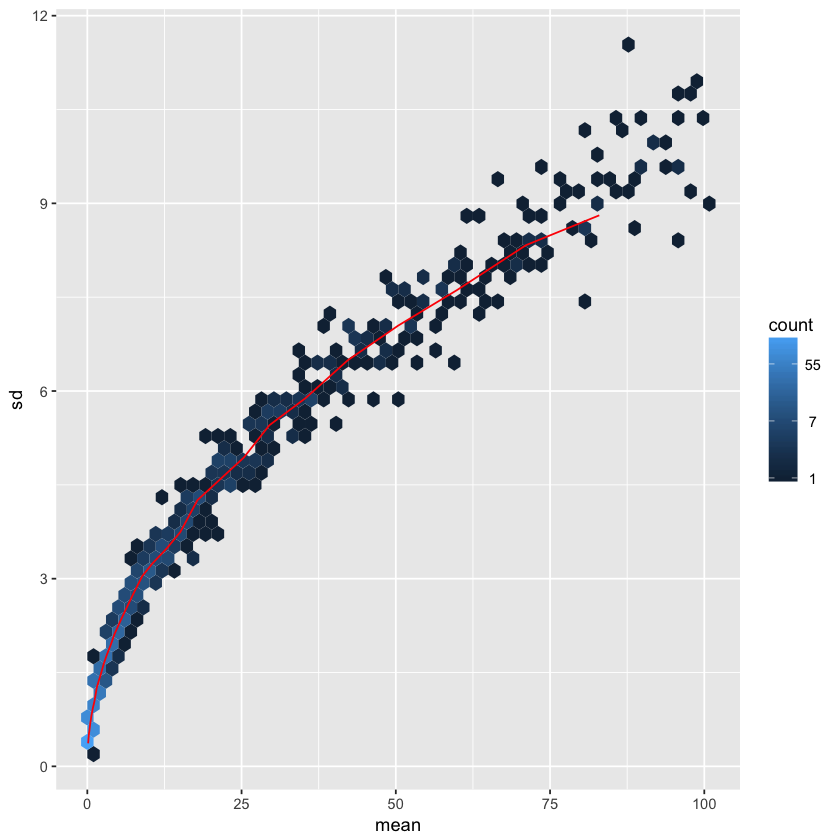

In [51]:
lambda <- 10^seq(from = -1, to = 2, length = 1000)
cts <- matrix(rpois(1000*100, lambda), ncol = 100)
library("vsn")
meanSdPlot(cts, ranks = FALSE)

And for logarithm-transformed counts:

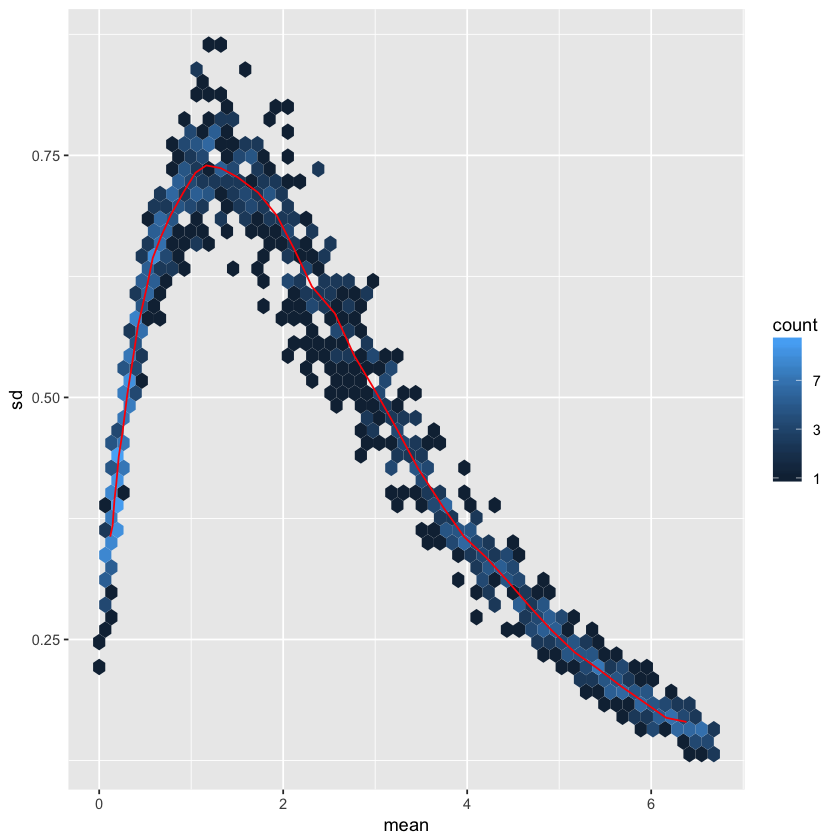

In [52]:
log.cts.one <- log2(cts + 1)
meanSdPlot(log.cts.one, ranks = FALSE)

The logarithm with a small pseudocount amplifies differences when the values are close to 0. The low count genes with low signal-to-noise ratio will overly contribute to sample-sample distances and PCA plots.

As a solution, DESeq2 offers two transformations for count data that stabilize the variance across the mean: the regularized-logarithm transformation or rlog (Love, Huber, and Anders 2014), and the variance stabilizing transformation (VST) for negative binomial data with a dispersion-mean trend (Anders and Huber 2010), implemented in the vst function.

For genes with high counts, the rlog and VST will give similar result to the ordinary log2 transformation of normalized counts. For genes with lower counts, however, the values are shrunken towards the genes’ averages across all samples. The rlog-transformed or VST data then becomes approximately homoskedastic, and can be used directly for computing distances between samples, making PCA plots, or as input to downstream methods which perform best with homoskedastic data.

Which transformation to choose? The rlog tends to work well on small datasets (n < 30), sometimes outperforming the VST when there is a large range of sequencing depth across samples (an order of magnitude difference). The VST is much faster to compute and is less sensitive to high count outliers than the rlog. We therefore recommend the VST for large datasets (hundreds of samples). You can perform both transformations and compare the meanSdPlot or PCA plots generated, as described below.

Note that the two transformations offered by DESeq2 are provided for applications other than differential testing. For differential testing we recommend the DESeq function applied to raw counts, as described later in this workflow, which also takes into account the dependence of the variance of counts on the mean value during the dispersion estimation step.

The function rlog returns an object based on the SummarizedExperiment class that contains the rlog-transformed values in its assay slot.

The following will take a while.

In [53]:
date()

[1] "Mon Mar 26 22:24:03 2018"

In [54]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,ERR1949303,ERR1949304,ERR1949305,ERR1949306,ERR1949307,ERR1949308,ERR1949309,ERR1949310,ERR1949311,ERR1949312,⋯,ERR1949583,ERR1949584,ERR1949585,ERR1949586,ERR1949587,ERR1949588,ERR1949589,ERR1949590,ERR1949591,ERR1949592
ENSG00000001084.10,-2.393058,-2.393042,-2.393119,-2.393021,-2.392979,-2.392977,-2.393010,-2.392995,-2.393011,-2.392970,⋯,-2.392924,-2.392768,-2.393023,-2.393046,-2.392967,-2.393029,-2.392949,-2.393068,-2.392898,-2.393046
ENSG00000001460.17,-2.432795,-2.432786,-2.432829,-2.432774,-2.432750,-2.432749,-2.432767,-2.432759,-2.432768,-2.432745,⋯,-2.432719,-2.432631,-2.432775,-2.432788,-2.432743,-2.432778,-2.432733,-2.432800,-2.432705,-2.432788
ENSG00000001497.16,-2.432872,-2.432853,-2.432945,-2.432828,-2.432778,-2.432774,-2.432814,-2.432796,-2.432815,-2.432767,⋯,-2.432712,-2.432524,-2.432830,-2.432858,-2.432763,-2.432838,-2.432742,-2.432884,-2.432680,-2.432857


In [55]:
date()

[1] "Tue Mar 27 05:19:00 2018"

The function vst returns a similar object:

In [ ]:
#vsd <- vst(dds, blind = FALSE)

#Error in vst(dds, blind = FALSE): less than 'nsub' rows,
#  it is recommended to use varianceStabilizingTransformation directly
#Traceback:
#
#1. vst(dds, blind = FALSE)
#2. stop("less than 'nsub' rows,\n  it is recommended to use varianceStabilizingTransformation directly")

vsd <- varianceStabilizingTransformation(dds, blind=FALSE)

head(assay(vsd), 3)

In [ ]:
date()

In the above function calls, we specified blind = FALSE, which means that differences between cell lines and treatment (the variables in the design) will not contribute to the expected variance-mean trend of the experiment. The experimental design is not used directly in the transformation, only in estimating the global amount of variability in the counts. For a fully unsupervised transformation, one can set blind = TRUE (which is the default).

To show the effect of the transformation, in the figure below we plot the first sample against the second, first simply using the log2 function (after adding 1, to avoid taking the log of zero), and then using the rlog- and VST-transformed values. For the log2 approach, we need to first estimate size factors to account for sequencing depth, and then specify normalized=TRUE. Sequencing depth correction is done automatically for the rlog and the vst.

In [ ]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"))
  
colnames(df)[1:2] <- c("x", "y")  

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)

In [ ]:
date()

Scatterplot of transformed counts from two samples. Shown are scatterplots using the log2 transform of normalized counts (left), using the rlog (middle), and using the VST (right). While the rlog is on roughly the same scale as the log2 counts, the VST has a upward shift for the smaller values. It is the differences between samples (deviation from y=x in these scatterplots) which will contribute to the distance calculations and the PCA plot.

We can see how genes with low counts (bottom left-hand corner) seem to be excessively variable on the ordinary logarithmic scale, while the rlog transform and VST compress differences for the low count genes for which the data provide little information about differential expression.

≣Table of Contents
▸PCA plot
◂The rlog and variance stabilizing transformations
▴Exploratory analysis and visualization
5.3 Sample distances
A useful first step in an RNA-seq analysis is often to assess overall similarity between samples: Which samples are similar to each other, which are different? Does this fit to the expectation from the experiment’s design?

We use the R function dist to calculate the Euclidean distance between samples. To ensure we have a roughly equal contribution from all genes, we use it on the rlog-transformed data. We need to transpose the matrix of values using t, because the dist function expects the different samples to be rows of its argument, and different dimensions (here, genes) to be columns.

In [ ]:
sampleDists <- dist(t(assay(rld)))
sampleDists

We visualize the distances in a heatmap in a figure below, using the function pheatmap from the pheatmap package.

In [ ]:
library("pheatmap")
library("RColorBrewer")

In order to plot the sample distance matrix with the rows/columns arranged by the distances in our distance matrix, we manually provide sampleDists to the clustering_distance argument of the pheatmap function. Otherwise the pheatmap function would assume that the matrix contains the data values themselves, and would calculate distances between the rows/columns of the distance matrix, which is not desired. We also manually specify a blue color palette using the colorRampPalette function from the RColorBrewer package.

In [ ]:
date()

In [ ]:
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- paste( rld$disease, rld$individual, sep = " - " )
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

In [ ]:
date()

Heatmap of sample-to-sample distances using the rlog-transformed values.

Note that we have changed the row names of the distance matrix to contain treatment type and patient number instead of sample ID, so that we have all this information in view when looking at the heatmap.

Another option for calculating sample distances is to use the Poisson Distance (Witten 2011), implemented in the PoiClaClu package. This measure of dissimilarity between counts also takes the inherent variance structure of counts into consideration when calculating the distances between samples. The PoissonDistance function takes the original count matrix (not normalized) with samples as rows instead of columns, so we need to transpose the counts in dds.

In [ ]:
library("PoiClaClu")
poisd <- PoissonDistance(t(counts(dds)))

In [ ]:
date()

We plot the heatmap in a Figure below.

In [ ]:
samplePoisDistMatrix <- as.matrix( poisd$dd )
rownames(samplePoisDistMatrix) <- paste( rld$disease, rld$individual, sep=" - " )
colnames(samplePoisDistMatrix) <- NULL
pheatmap(samplePoisDistMatrix,
         clustering_distance_rows = poisd$dd,
         clustering_distance_cols = poisd$dd,
         col = colors)

In [ ]:
date()

Heatmap of sample-to-sample distances using the Poisson Distance.


## 5.4 PCA plot
Another way to visualize sample-to-sample distances is a principal components analysis (PCA). In this ordination method, the data points (here, the samples) are projected onto the 2D plane such that they spread out in the two directions that explain most of the differences (figure below). The x-axis is the direction that separates the data points the most. The values of the samples in this direction are written PC1. The y-axis is a direction (it must be orthogonal to the first direction) that separates the data the second most. The values of the samples in this direction are written PC2. The percent of the total variance that is contained in the direction is printed in the axis label. Note that these percentages do not add to 100%, because there are more dimensions that contain the remaining variance (although each of these remaining dimensions will explain less than the two that we see).

In [ ]:
date()

In [ ]:
plotPCA(rld, intgroup = c("disease", "individual"))

In [ ]:
date()

PCA plot using the rlog-transformed values. Each unique combination of treatment and cell line is given its own color.

Here, we have used the function plotPCA that comes with DESeq2. The two terms specified by intgroup are the interesting groups for labeling the samples; they tell the function to use them to choose colors. We can also build the PCA plot from scratch using the ggplot2 package (Wickham 2009). This is done by asking the plotPCA function to return the data used for plotting rather than building the plot. See the ggplot2 documentation for more details on using ggplot.

In [ ]:
pcaData <- plotPCA(rld, intgroup = c( "disease", "individual"), returnData = TRUE)
pcaData

In [ ]:
date()

In [ ]:
percentVar <- round(100 * attr(pcaData, "percentVar"))

We can then use these data to build up a second plot in a figure below, specifying that the color of the points should reflect dexamethasone treatment and the shape should reflect the cell line.

In [ ]:
ggplot(pcaData, aes(x = PC1, y = PC2, color = disease, shape = individual)) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed()

PCA plot using the rlog-transformed values with custom ggplot2 code. Here we specify cell line (plotting symbol) and dexamethasone treatment (color).

From the PCA plot, we see that the differences between cells (the different plotting shapes) are considerable, though not stronger than the differences due to treatment with dexamethasone (red vs blue color). This shows why it will be important to account for this in differential testing by using a paired design (“paired”, because each dex treated sample is paired with one untreated sample from the same cell line). We are already set up for this design by assigning the formula ~ cell + dex earlier.


## 5.5 MDS plot
Another plot, very similar to the PCA plot, can be made using the multidimensional scaling (MDS) function in base R. This is useful when we don’t have a matrix of data, but only a matrix of distances. Here we compute the MDS for the distances calculated from the rlog transformed counts and plot these in a figure below.

In [ ]:
mds <- as.data.frame(colData(rld))  %>%
         cbind(cmdscale(sampleDistMatrix))
ggplot(mds, aes(x = `1`, y = `2`, color = disease, shape = individual)) +
  geom_point(size = 3) + coord_fixed()

MDS plot using rlog-transformed values.

In a figure below we show the same plot for the PoissonDistance:

In [ ]:
mdsPois <- as.data.frame(colData(dds)) %>%
   cbind(cmdscale(samplePoisDistMatrix))
ggplot(mdsPois, aes(x = `1`, y = `2`, color = disease, shape = individual)) +
  geom_point(size = 3) + coord_fixed()

MDS plot using the Poisson Distance.


# 6 Differential expression analysis
## 6.1 Running the differential expression pipeline
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

In [ ]:
dds <- DESeq(dds)

In [ ]:
date()

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.


## 6.2 Building the results table
Calling results without any arguments will extract the estimated log2 fold changes and p values for the last variable in the design formula. If there are more than 2 levels for this variable, results will extract the results table for a comparison of the last level over the first level. The comparison is printed at the top of the output: dex trt vs untrt.

In [ ]:
res <- results(dds)
res

We could have equivalently produced this results table with the following more specific command. Because dex is the last variable in the design, we could optionally leave off the contrast argument to extract the comparison of the two levels of dex.

In [ ]:
res <- results(dds, contrast=c("disease","normal","carcinoma"))

As res is a DataFrame object, it carries metadata with information on the meaning of the columns:

In [ ]:
mcols(res, use.names = TRUE)

The first column, baseMean, is a just the average of the normalized count values, divided by the size factors, taken over all samples in the DESeqDataSet. The remaining four columns refer to a specific contrast, namely the comparison of the trt level over the untrt level for the factor variable dex. We will find out below how to obtain other contrasts.

The column log2FoldChange is the effect size estimate. It tells us how much the gene’s expression seems to have changed due to treatment with dexamethasone in comparison to untreated samples. This value is reported on a logarithmic scale to base 2: for example, a log2 fold change of 1.5 means that the gene’s expression is increased by a multiplicative factor of 21.5≈2.82.

Of course, this estimate has an uncertainty associated with it, which is available in the column lfcSE, the standard error estimate for the log2 fold change estimate. We can also express the uncertainty of a particular effect size estimate as the result of a statistical test. The purpose of a test for differential expression is to test whether the data provides sufficient evidence to conclude that this value is really different from zero. DESeq2 performs for each gene a hypothesis test to see whether evidence is sufficient to decide against the null hypothesis that there is zero effect of the treatment on the gene and that the observed difference between treatment and control was merely caused by experimental variability (i.e., the type of variability that you can expect between different samples in the same treatment group). As usual in statistics, the result of this test is reported as a p value, and it is found in the column pvalue. Remember that a p value indicates the probability that a fold change as strong as the observed one, or even stronger, would be seen under the situation described by the null hypothesis.

We can also summarize the results with the following line of code, which reports some additional information, that will be covered in later sections.

In [ ]:
summary(res)

Note that there are many genes with differential expression due to dexamethasone treatment at the FDR level of 10%. This makes sense, as the smooth muscle cells of the airway are known to react to glucocorticoid steroids. However, there are two ways to be more strict about which set of genes are considered significant:

* lower the false discovery rate threshold (the threshold on padj in the results table)
* raise the log2 fold change threshold from 0 using the lfcThreshold argument of results

If we lower the false discovery rate threshold, we should also inform the results() function about it, so that the function can use this threshold for the optimal independent filtering that it performs:

In [ ]:
res.05 <- results(dds, alpha = 0.05)
table(res.05$padj < 0.05)

If we want to raise the log2 fold change threshold, so that we test for genes that show more substantial changes due to treatment, we simply supply a value on the log2 scale. For example, by specifying lfcThreshold = 1, we test for genes that show significant effects of treatment on gene counts more than doubling or less than halving, because 2^1=2.

In [ ]:
resLFC1 <- results(dds, lfcThreshold=1)
table(resLFC1$padj < 0.1)

In [ ]:
date()

Sometimes a subset of the p values in res will be NA (“not available”). This is DESeq’s way of reporting that all counts for this gene were zero, and hence no test was applied. In addition, p values can be assigned NA if the gene was excluded from analysis because it contained an extreme count outlier. For more information, see the outlier detection section of the DESeq2 vignette.

If you use the results from an R analysis package in published research, you can find the proper citation for the software by typing citation("pkgName"), where you would substitute the name of the package for pkgName. Citing methods papers helps to support and reward the individuals who put time into open source software for genomic data analysis.


## 6.3 Other comparisons
In general, the results for a comparison of any two levels of a variable can be extracted using the contrast argument to results. The user should specify three values: the name of the variable, the name of the level for the numerator, and the name of the level for the denominator. Here we extract results for the log2 of the fold change of one cell line over another:

In [ ]:
results(dds, contrast = c("individual", "AA1019", "AA1090"))

There are additional ways to build results tables for certain comparisons after running DESeq once. If results for an interaction term are desired, the name argument of results should be used. Please see the help page for the results function for details on the additional ways to build results tables. In particular, the Examples section of the help page for results gives some pertinent examples.


## 6.4 Multiple testing
In high-throughput biology, we are careful to not use the p values directly as evidence against the null, but to correct for multiple testing. What would happen if we were to simply threshold the p values at a low value, say 0.05? There are 5676 genes with a p value below 0.05 among the 29391 genes for which the test succeeded in reporting a p value:

In [ ]:
sum(res$pvalue < 0.05, na.rm=TRUE)

In [ ]:
sum(!is.na(res$pvalue))

Now, assume for a moment that the null hypothesis is true for all genes, i.e., no gene is affected by the treatment with dexamethasone. Then, by the definition of the p value, we expect up to 5% of the genes to have a p value below 0.05. This amounts to 1470 genes. If we just considered the list of genes with a p value below 0.05 as differentially expressed, this list should therefore be expected to contain up to 1470 / 5676 = 26% false positives.

DESeq2 uses the Benjamini-Hochberg (BH) adjustment (Benjamini and Hochberg 1995) as implemented in the base R p.adjust function; in brief, this method calculates for each gene an adjusted p value that answers the following question: if one called significant all genes with an adjusted p value less than or equal to this gene’s adjusted p value threshold, what would be the fraction of false positives (the false discovery rate, FDR) among them, in the sense of the calculation outlined above? These values, called the BH-adjusted p values, are given in the column padj of the res object.

The FDR is a useful statistic for many high-throughput experiments, as we are often interested in reporting or focusing on a set of interesting genes, and we would like to put an upper bound on the percent of false positives in this set.

Hence, if we consider a fraction of 10% false positives acceptable, we can consider all genes with an adjusted p value below 10% = 0.1 as significant. How many such genes are there?

In [ ]:
sum(res$padj < 0.1, na.rm=TRUE)

We subset the results table to these genes and then sort it by the log2 fold change estimate to get the significant genes with the strongest down-regulation:

In [ ]:
resSig <- subset(res, padj < 0.1)
head(resSig[ order(resSig$log2FoldChange), ])

…and with the strongest up-regulation:

In [ ]:
head(resSig[ order(resSig$log2FoldChange, decreasing = TRUE), ])

In [ ]:
date()

# 7 Plotting results
## 7.1 Counts plot
A quick way to visualize the counts for a particular gene is to use the plotCounts function that takes as arguments the DESeqDataSet, a gene name, and the group over which to plot the counts (figure below).

In [ ]:
topGene <- rownames(res)[which.min(res$padj)]
plotCounts(dds, gene = topGene, intgroup=c("disease"))

Normalized counts for a single gene over treatment group.

We can also make custom plots using the ggplot function from the ggplot2 package (figures below).

In [ ]:
library("ggbeeswarm")
geneCounts <- plotCounts(dds, gene = topGene, intgroup = c("disease","individual"),
                         returnData = TRUE)
ggplot(geneCounts, aes(x = disease, y = count, color = individual)) +
  scale_y_log10() +  geom_beeswarm(cex = 3)

In [ ]:
ggplot(geneCounts, aes(x = disease, y = count, color = individual, group = individual)) +
  scale_y_log10() + geom_point(size = 3) + geom_line()

Normalized counts with lines connecting cell lines. Note that the DESeq test actually takes into account the cell line effect, so this figure more closely depicts the difference being tested.


## 7.2 MA-plot
An MA-plot (R. Dudoit et al. 2002) provides a useful overview for the distribution of the estimated coefficients in the model, e.g. the comparisons of interest, across all genes. On the y-axis, the “M” stands for “minus” – subtraction of log values is equivalent to the log of the ratio – and on the x-axis, the “A” stands for “average”. You may hear this plot also referred to as a mean-difference plot, or a Bland-Altman plot.

Before making the MA-plot, we use the lfcShrink function to shrink the log2 fold changes for the comparison of dex treated vs untreated samples:

In [ ]:
res <- lfcShrink(dds, contrast=c("disease","carcinoma","normal"), res=res)
plotMA(res, ylim = c(-5, 5))

An MA-plot of changes induced by treatment. The log2 fold change for a particular comparison is plotted on the y-axis and the average of the counts normalized by size factor is shown on the x-axis. Each gene is represented with a dot. Genes with an adjusted p value below a threshold (here 0.1, the default) are shown in red.

The DESeq2 package uses a Bayesian procedure to moderate (or “shrink”) log2 fold changes from genes with very low counts and highly variable counts, as can be seen by the narrowing of the vertical spread of points on the left side of the MA-plot. As shown above, the lfcShrink function performs this operation. For a detailed explanation of the rationale of moderated fold changes, please see the DESeq2 paper (Love, Huber, and Anders 2014).

If we had not used statistical moderation to shrink the noisy log2 fold changes, we would have instead seen the following plot:

In [ ]:
res.noshr <- results(dds)
plotMA(res.noshr, ylim = c(-5, 5))

In [ ]:
date()

We can label individual points on the MA-plot as well. Here we use the with R function to plot a circle and text for a selected row of the results object. Within the with function, only the baseMean and log2FoldChange values for the selected rows of res are used.

In [ ]:
plotMA(res, ylim = c(-5,5))
topGene <- rownames(res)[which.min(res$padj)]
with(res[topGene, ], {
  points(baseMean, log2FoldChange, col="dodgerblue", cex=2, lwd=2)
  text(baseMean, log2FoldChange, topGene, pos=2, col="dodgerblue")
})

Another useful diagnostic plot is the histogram of the p values (figure below). This plot is best formed by excluding genes with very small counts, which otherwise generate spikes in the histogram.

In [ ]:
hist(res$pvalue[res$baseMean > 1], breaks = 0:20/20,
     col = "grey50", border = "white")

Histogram of p values for genes with mean normalized count larger than 1.


## 7.3 Gene clustering
In the sample distance heatmap made previously, the dendrogram at the side shows us a hierarchical clustering of the samples. Such a clustering can also be performed for the genes. Since the clustering is only relevant for genes that actually carry a signal, one usually would only cluster a subset of the most highly variable genes. Here, for demonstration, let us select the 20 genes with the highest variance across samples. We will work with the rlog transformed counts:

In [ ]:
library("genefilter")
topVarGenes <- head(order(rowVars(assay(rld)), decreasing = TRUE), 20)

The heatmap becomes more interesting if we do not look at absolute expression strength but rather at the amount by which each gene deviates in a specific sample from the gene’s average across all samples. Hence, we center each genes’ values across samples, and plot a heatmap (figure below). We provide a data.frame that instructs the pheatmap function how to label the columns.

In [ ]:
mat  <- assay(rld)[ topVarGenes, ]
mat  <- mat - rowMeans(mat)
anno <- as.data.frame(colData(rld)[, c("individual","disease")])
pheatmap(mat, annotation_col = anno)

Heatmap of relative rlog-transformed values across samples. Treatment status and cell line information are shown with colored bars at the top of the heatmap. Blocks of genes that covary across patients. Note that a set of genes at the top of the heatmap are separating the N061011 cell line from the others. In the center of the heatmap, we see a set of genes for which the dexamethasone treated samples have higher gene expression.


## 7.4 Independent filtering
The MA plot highlights an important property of RNA-seq data. For weakly expressed genes, we have no chance of seeing differential expression, because the low read counts suffer from such high Poisson noise that any biological effect is drowned in the uncertainties from the sampling at a low rate. We can also show this by examining the ratio of small p values (say, less than 0.05) for genes binned by mean normalized count. We will use the results table subjected to the threshold to show what this looks like in a case when there are few tests with small p value.

In the following code chunk, we create bins using the quantile function, bin the genes by base mean using cut, rename the levels of the bins using the middle point, calculate the ratio of p values less than 0.05 for each bin, and finally plot these ratios (figure below).

In [ ]:
qs <- c(0, quantile(resLFC1$baseMean[resLFC1$baseMean > 0], 0:6/6))
bins <- cut(resLFC1$baseMean, qs)
levels(bins) <- paste0("~", round(signif((qs[-1] + qs[-length(qs)])/2, 2)))
fractionSig <- tapply(resLFC1$pvalue, bins, function(p)
                          mean(p < .05, na.rm = TRUE))
barplot(fractionSig, xlab = "mean normalized count",
                     ylab = "fraction of small p values")

In [ ]:
date()

The ratio of small p values for genes binned by mean normalized count. The p values are from a test of log2 fold change greater than 1 or less than -1. This plot demonstrates that genes with very low mean count have little or no power, and are best excluded from testing.

At first sight, there may seem to be little benefit in filtering out these genes. After all, the test found them to be non-significant anyway. However, these genes have an influence on the multiple testing adjustment, whose performance improves if such genes are removed. By removing the low count genes from the input to the FDR procedure, we can find more genes to be significant among those that we keep, and so improved the power of our test. This approach is known as independent filtering.

The DESeq2 software automatically performs independent filtering that maximizes the number of genes with adjusted p value less than a critical value (by default, alpha is set to 0.1). This automatic independent filtering is performed by, and can be controlled by, the results function.

The term independent highlights an important caveat. Such filtering is permissible only if the statistic that we filter on (here the mean of normalized counts across all samples) is independent of the actual test statistic (the p value) under the null hypothesis. Otherwise, the filtering would invalidate the test and consequently the assumptions of the BH procedure. The independent filtering software used inside DESeq2 comes from the genefilter package, that contains a reference to a paper describing the statistical foundation for independent filtering (Bourgon, Gentleman, and Huber 2010).



# 8 Annotating and exporting results
Our result table so far only contains the Ensembl gene IDs, but alternative gene names may be more informative for interpretation. Bioconductor’s annotation packages help with mapping various ID schemes to each other. We load the AnnotationDbi package and the annotation package org.Hs.eg.db:

In [ ]:
library("AnnotationDbi")
library("org.Hs.eg.db")

This is the organism annotation package (“org”) for Homo sapiens (“Hs”), organized as an AnnotationDbi database package (“db”), using Entrez Gene IDs (“eg”) as primary key. To get a list of all available key types, use:

In [ ]:
columns(org.Hs.eg.db)

We can use the mapIds function to add individual columns to our results table. We provide the row names of our results table as a key, and specify that keytype=ENSEMBL. The column argument tells the mapIds function which information we want, and the multiVals argument tells the function what to do if there are multiple possible values for a single input value. Here we ask to just give us back the first one that occurs in the database. To add the gene symbol and Entrez ID, we call mapIds twice.

In [ ]:
res$symbol <- mapIds(org.Hs.eg.db,
                     keys=row.names(res),
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res$entrez <- mapIds(org.Hs.eg.db,
                     keys=row.names(res),
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

Now the results have the desired external gene IDs:

In [ ]:
resOrdered <- res[order(res$pvalue),]
head(resOrdered)

In [ ]:
date()

## 8.1 Exporting results
You can easily save the results table in a CSV file that you can then share or load with a spreadsheet program such as Excel. The call to as.data.frame is necessary to convert the DataFrame object (IRanges package) to a data.frame object that can be processed by write.csv. Here, we take just the top 100 genes for demonstration.

In [ ]:
resOrderedDF <- as.data.frame(resOrdered)[1:100, ]
write.csv(resOrderedDF, file = "results.csv")

A more sophisticated way for exporting results the Bioconductor package ReportingTools (Huntley et al. 2013). ReportingTools will automatically generate dynamic HTML documents, including links to external databases using gene identifiers and boxplots summarizing the normalized counts across groups. See the ReportingTools vignettes for full details. The simplest version of creating a dynamic ReportingTools report is performed with the following code:

In [ ]:
library("ReportingTools")
htmlRep <- HTMLReport(shortName="report", title="My report",
                      reportDirectory="./report")
publish(resOrderedDF, htmlRep)
url <- finish(htmlRep)
browseURL(url)

In [ ]:
date()

## 8.2 Plotting fold changes in genomic space
If we have used the summarizeOverlaps function to count the reads, then our DESeqDataSet object is built on top of ready-to-use Bioconductor objects specifying the genomic coordinates of the genes. We can therefore easily plot our differential expression results in genomic space. While the results function by default returns a DataFrame, using the format argument, we can ask for GRanges or GRangesList output.

In [ ]:
resGR <- results(dds, lfcThreshold = 1, format = "GRanges")
resGR

We need to add the symbol again for labeling the genes on the plot:

In [ ]:
resGR$symbol <- mapIds(org.Hs.eg.db, names(resGR), "SYMBOL", "ENSEMBL")

We will use the Gviz package for plotting the GRanges and associated metadata: the log fold changes due to dexamethasone treatment.

In [ ]:
library("Gviz")

The following code chunk specifies a window of 1 million base pairs upstream and downstream from the gene with the smallest p value. We create a subset of our full results, for genes within the window. We add the gene symbol as a name if the symbol exists and is not duplicated in our subset.

In [ ]:
window <- resGR[topGene] + 1e6
strand(window) <- "*"
resGRsub <- resGR[resGR %over% window]
naOrDup <- is.na(resGRsub$symbol) | duplicated(resGRsub$symbol)
resGRsub$group <- ifelse(naOrDup, names(resGRsub), resGRsub$symbol)

We create a vector specifying if the genes in this subset had a low value of padj.

In [ ]:
status <- factor(ifelse(resGRsub$padj < 0.1 & !is.na(resGRsub$padj),
                     "sig", "notsig"))

We can then plot the results using Gviz functions (figure below). We create an axis track specifying our location in the genome, a track that will show the genes and their names, colored by significance, and a data track that will draw vertical bars showing the moderated log fold change produced by DESeq2, which we know are only large when the effect is well supported by the information in the counts.

In [ ]:
options(ucscChromosomeNames = FALSE)
g <- GenomeAxisTrack()
a <- AnnotationTrack(resGRsub, name = "gene ranges", feature = status)
d <- DataTrack(resGRsub, data = "log2FoldChange", baseline = 0,
               type = "h", name = "log2 fold change", strand = "+")
plotTracks(list(g, d, a), groupAnnotation = "group",
           notsig = "grey", sig = "hotpink")

In [ ]:
date()

log2 fold changes in genomic region surrounding the gene with smallest adjusted p value. Genes highlighted in pink have adjusted p value less than 0.1.


# 9 Removing hidden batch effects
Suppose we did not know that there were different cell lines involved in the experiment, only that there was treatment with dexamethasone. The cell line effect on the counts then would represent some hidden and unwanted variation that might be affecting many or all of the genes in the dataset. We can use statistical methods designed for RNA-seq from the sva package (Leek 2014) to detect such groupings of the samples, and then we can add these to the DESeqDataSet design, in order to account for them. The SVA package uses the term surrogate variables for the estimated variables that we want to account for in our analysis. Another package for detecting hidden batches is the RUVSeq package (Risso et al. 2014), with the acronym “Remove Unwanted Variation”.

In [ ]:
library("sva")

Below we obtain a matrix of normalized counts for which the average count across samples is larger than 1. As we described above, we are trying to recover any hidden batch effects, supposing that we do not know the cell line information. So we use a full model matrix with the dex variable, and a reduced, or null, model matrix with only an intercept term. Finally we specify that we want to estimate 2 surrogate variables. For more information read the manual page for the svaseq function by typing ?svaseq.

In [ ]:
dat  <- counts(dds, normalized = TRUE)
idx  <- rowMeans(dat) > 1
dat  <- dat[idx, ]
mod  <- model.matrix(~ disease, colData(dds))
mod0 <- model.matrix(~   1, colData(dds))
svseq <- svaseq(dat, mod, mod0, n.sv = 2)

In [ ]:
svseq$sv

Because we actually do know the cell lines, we can see how well the SVA method did at recovering these variables (figure below).

In [ ]:
par(mfrow = c(2, 1), mar = c(3,5,3,1))
for (i in 1:2) {
  stripchart(svseq$sv[, i] ~ dds$individual, vertical = TRUE, main = paste0("SV", i))
  abline(h = 0)
 }

Surrogate variables 1 and 2 plotted over cell line. Here, we know the hidden source of variation (cell line), and therefore can see how the SVA procedure is able to identify a source of variation which is correlated with cell line.

Finally, in order to use SVA to remove any effect on the counts from our surrogate variables, we simply add these two surrogate variables as columns to the DESeqDataSet and then add them to the design:

In [ ]:
ddssva <- dds
ddssva$SV1 <- svseq$sv[,1]
ddssva$SV2 <- svseq$sv[,2]
design(ddssva) <- ~ SV1 + SV2 + disease

We could then produce results controlling for surrogate variables by running DESeq with the new design:

In [ ]:
ddssva %<>% DESeq

In [ ]:
date()

# 10 Time course experiments
DESeq2 can be used to analyze time course experiments, for example to find those genes that react in a condition-specific manner over time, compared to a set of baseline samples. Here we demonstrate a basic time course analysis with the fission data package, which contains gene counts for an RNA-seq time course of fission yeast (Leong et al. 2014). The yeast were exposed to oxidative stress, and half of the samples contained a deletion of the gene atf21. We use a design formula that models the strain difference at time 0, the difference over time, and any strain-specific differences over time (the interaction term strain:minute).

In [ ]:
library("fission")
data("fission")
ddsTC <- DESeqDataSet(fission, ~ strain + minute + strain:minute)

The following chunk of code performs a likelihood ratio test, where we remove the strain-specific differences over time. Genes with small p values from this test are those which at one or more time points after time 0 showed a strain-specific effect. Note therefore that this will not give small p values to genes that moved up or down over time in the same way in both strains.

In [ ]:
ddsTC <- DESeq(ddsTC, test="LRT", reduced = ~ strain + minute)
resTC <- results(ddsTC)
resTC$symbol <- mcols(ddsTC)$symbol
head(resTC[order(resTC$padj),], 4)

This is just one of the tests that can be applied to time series data. Another option would be to model the counts as a smooth function of time, and to include an interaction term of the condition with the smooth function. It is possible to build such a model using spline basis functions within R, and another, more modern approach is using Gaussian processes (Tonner et al. 2017).

We can plot the counts for the groups over time using ggplot2, for the gene with the smallest adjusted p value, testing for condition-dependent time profile and accounting for differences at time 0 (figure below). Keep in mind that the interaction terms are the difference between the two groups at a given time after accounting for the difference at time 0.

In [ ]:
fiss <- plotCounts(ddsTC, which.min(resTC$padj), 
                   intgroup = c("minute","strain"), returnData = TRUE)
ggplot(fiss,
  aes(x = as.numeric(minute), y = count, color = strain, group = strain)) + 
  geom_point() + geom_smooth(se = FALSE, method = "loess") + scale_y_log10()

In [ ]:
date()

Normalized counts for a gene with condition-specific changes over time.

Wald tests for the log2 fold changes at individual time points can be investigated using the test argument to results:

In [ ]:
resultsNames(ddsTC)

In [ ]:
res30 <- results(ddsTC, name="strainmut.minute30", test="Wald")
res30[which.min(resTC$padj),]

We can furthermore cluster significant genes by their profiles. We extract a matrix of the shrunken log2 fold changes using the coef function:

In [ ]:
betas <- coef(ddsTC)
colnames(betas)

We can now plot the log2 fold changes in a heatmap (figure below).

In [ ]:
topGenes <- head(order(resTC$padj),20)
mat <- betas[topGenes, -c(1,2)]
thr <- 3 
mat[mat < -thr] <- -thr
mat[mat > thr] <- thr
pheatmap(mat, breaks=seq(from=-thr, to=thr, length=101),
         cluster_col=FALSE)

Heatmap of log2 fold changes for genes with smallest adjusted p value. The bottom set of genes show strong induction of expression for the baseline samples in minutes 15-60 (red boxes in the bottom left corner), but then have slight differences for the mutant strain (shown in the boxes in the bottom right corner).


# 11 Session information
As the last part of this document, we call the function sessionInfo, which reports the version numbers of R and all the packages used in this session. It is good practice to always keep such a record of this as it will help to track down what has happened in case an R script ceases to work or gives different results because the functions have been changed in a newer version of one of your packages. By including it at the bottom of a script, your reports will become more reproducible.

The session information should also always be included in any emails to the Bioconductor support site along with all code used in the analysis.

In [ ]:
date()

In [ ]:
devtools::session_info()